# Wine Dataset for Clustering
### Cluster wines based on their chemical constituents

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

### Data Loading

In [1]:
import pandas as pd
import numpy as np  # list

# Data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn library
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CSTU/ML/

Mounted at /content/drive
/content/drive/My Drive/CSTU/ML


In [3]:
wine_data = pd.read_csv('./data/wine/wine-clustering.csv')
wine_data.shape

(178, 13)

In [4]:
print(wine_data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Data Analysis
Data Scaler

In [6]:
X = wine_data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


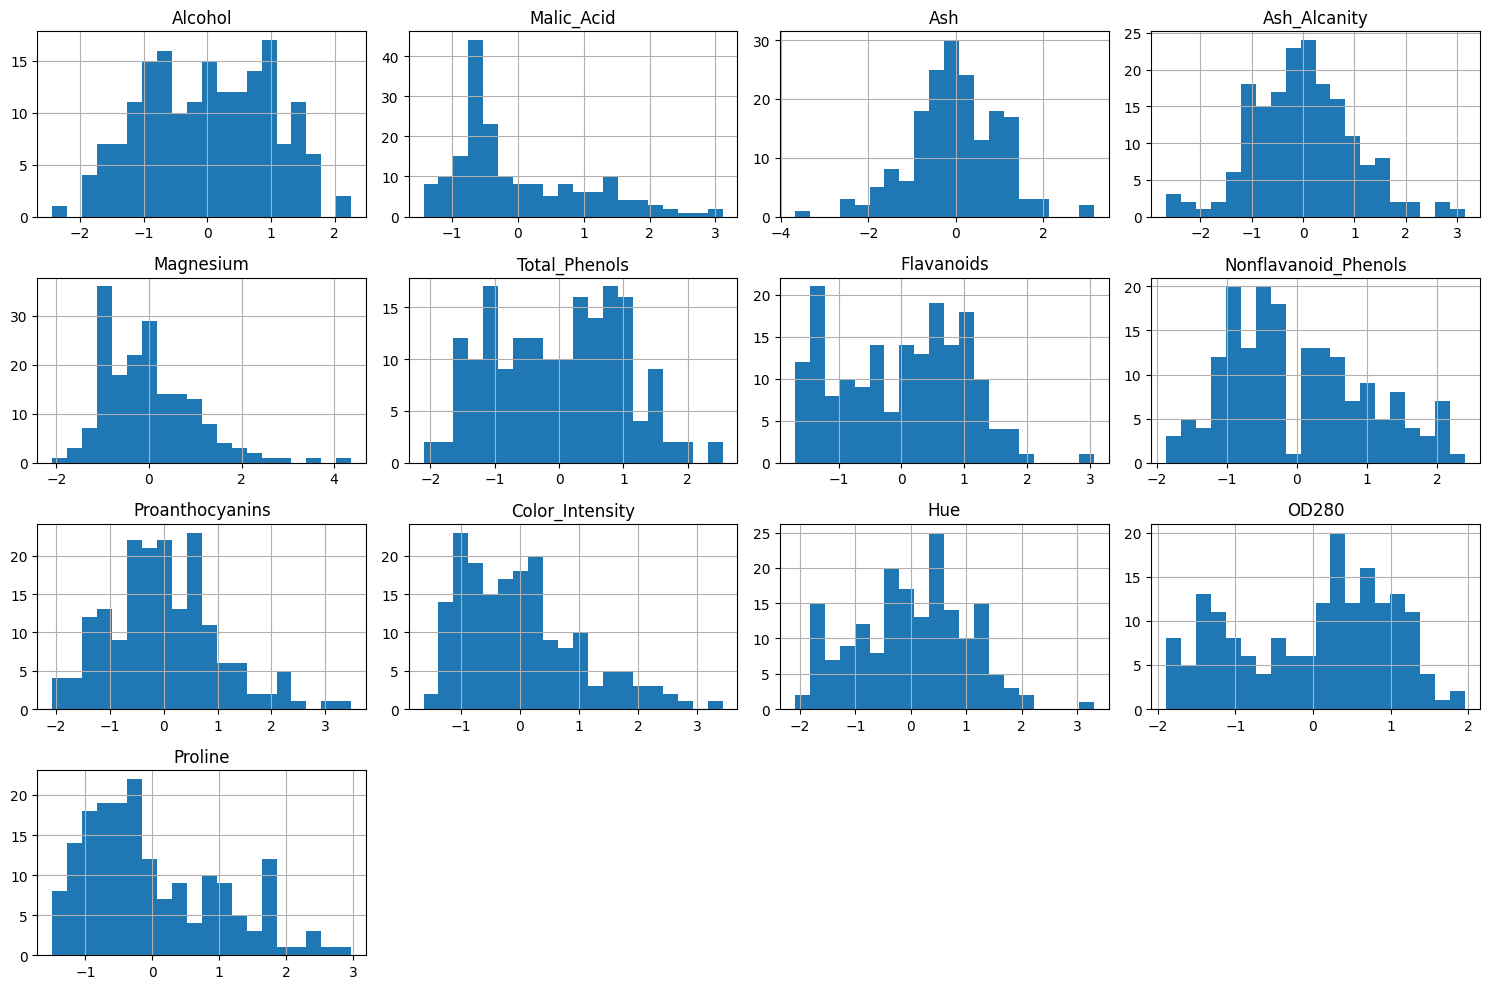

In [7]:
X_scaled_df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

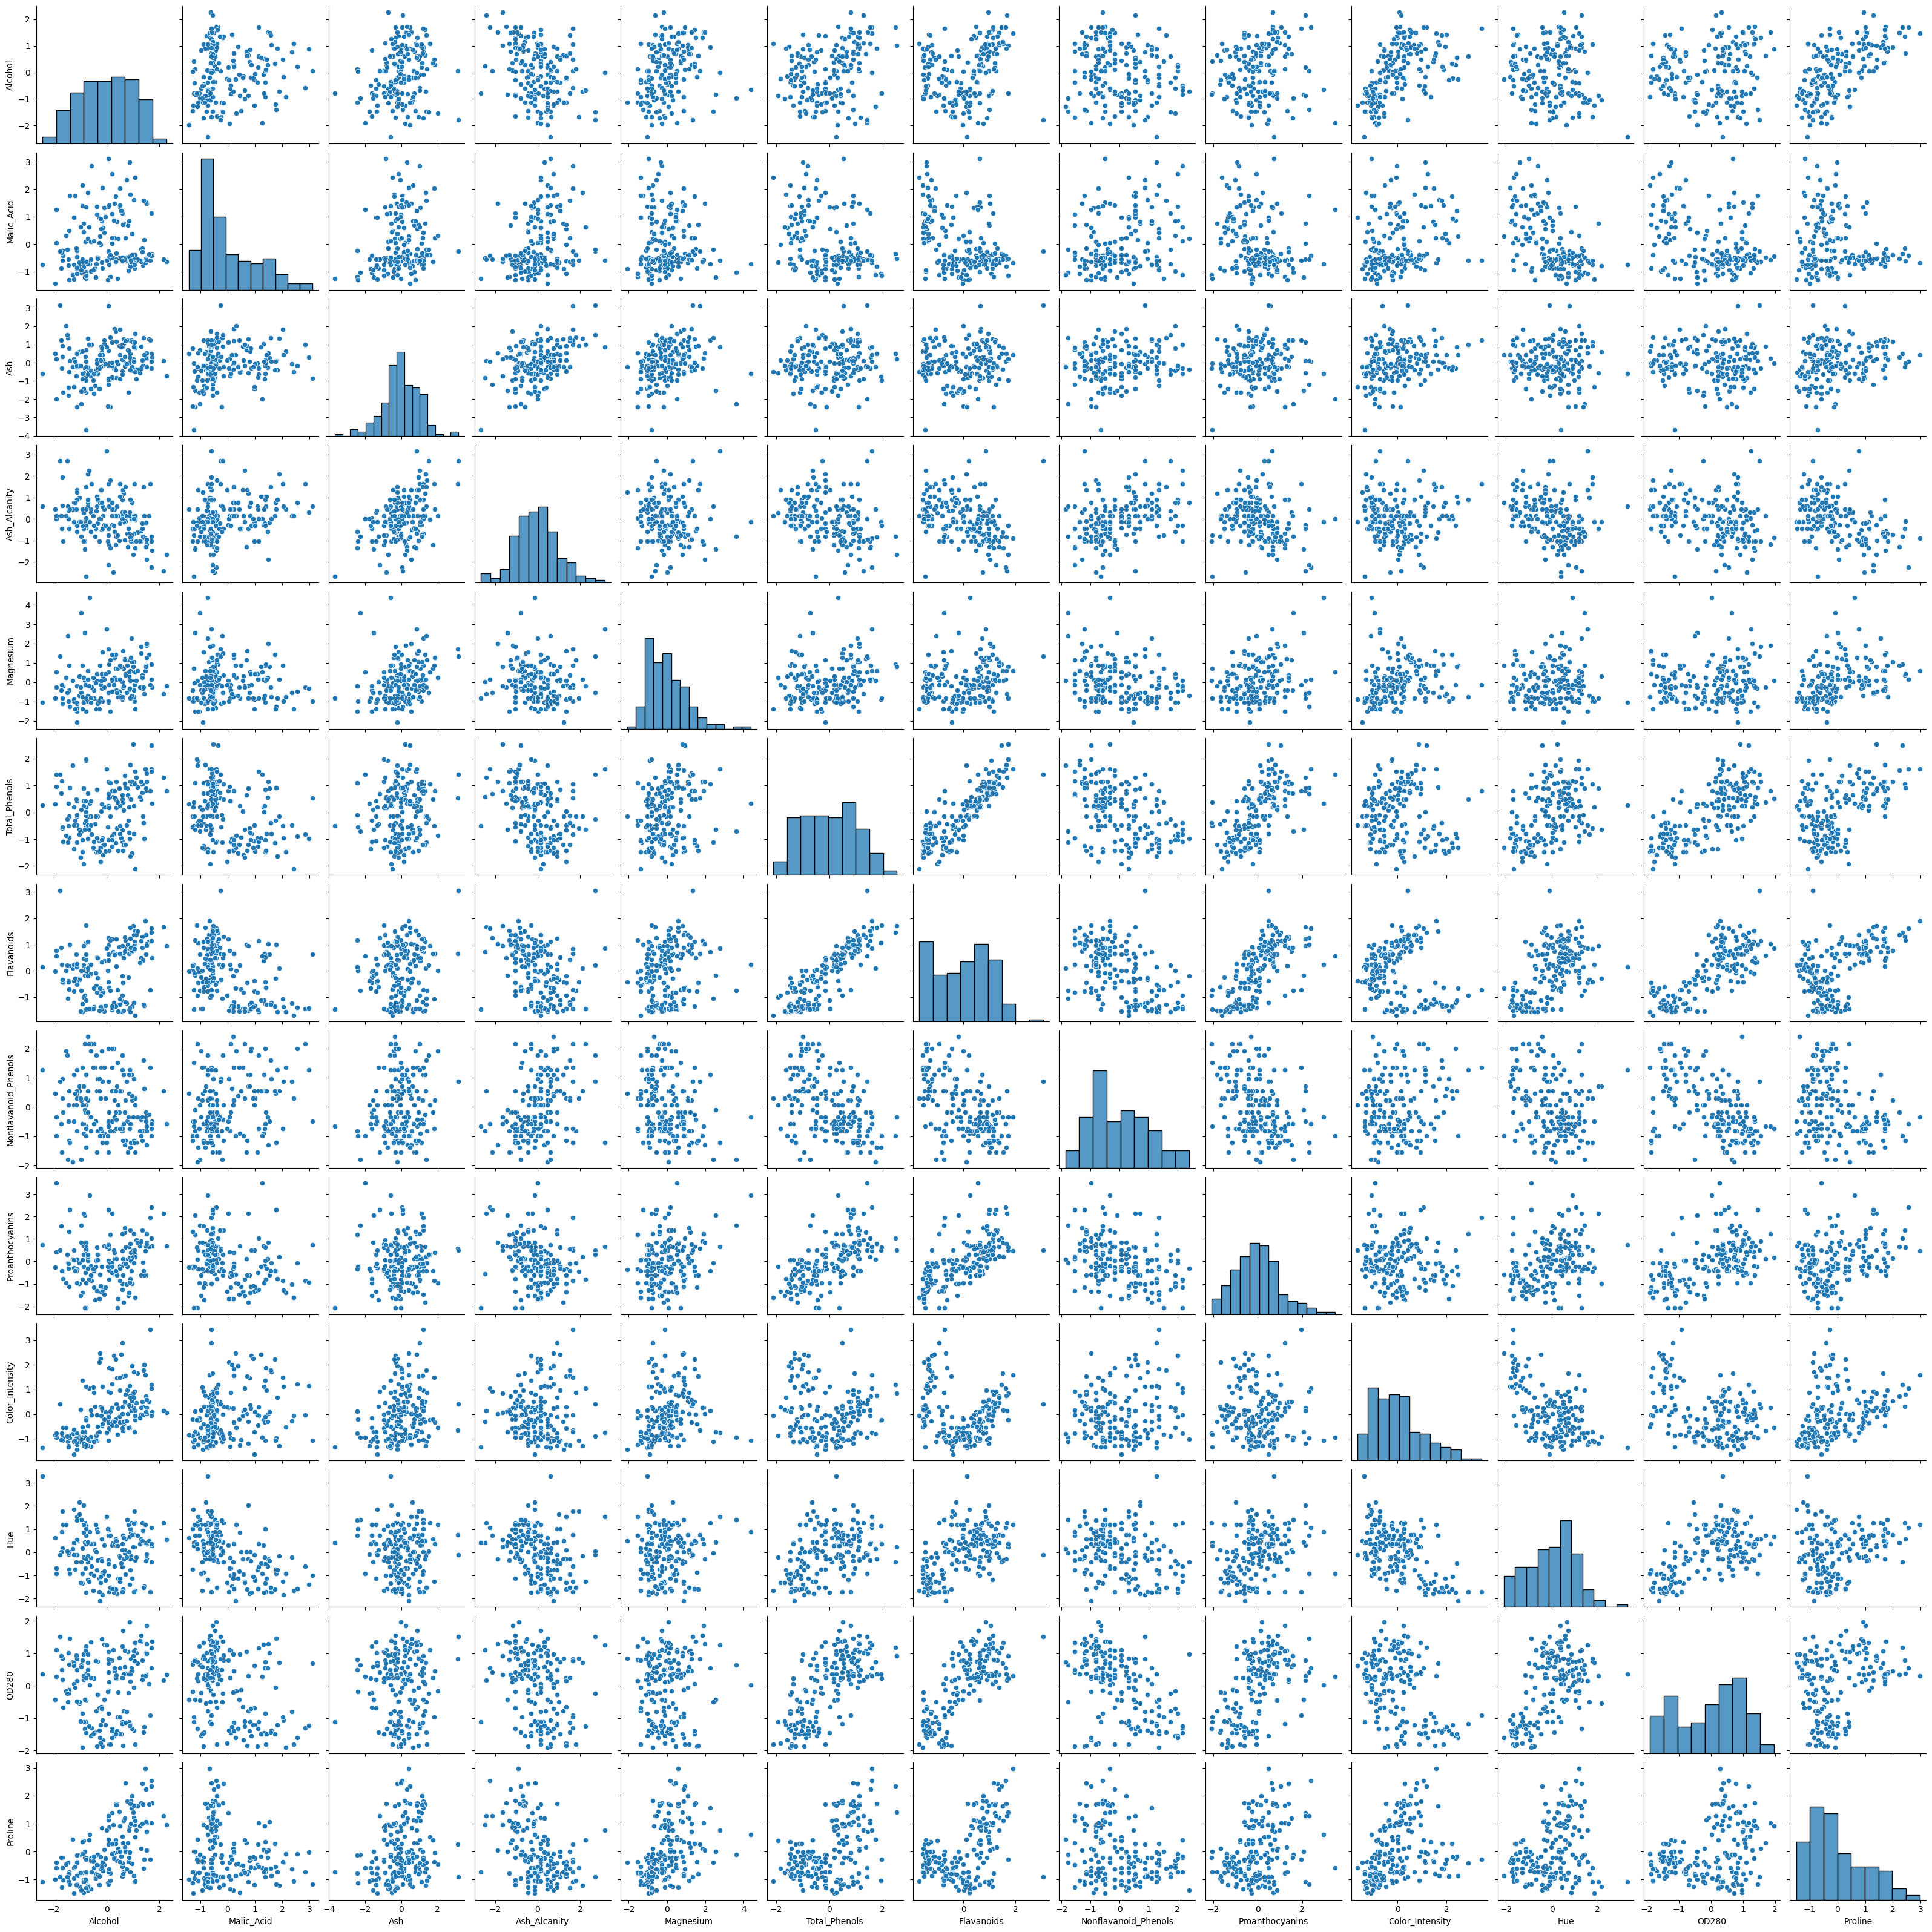

In [8]:
sns.pairplot(X_scaled_df)
plt.show()

### Dimensionality Reduction
Principal Component Analysis (PCA)

In [9]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

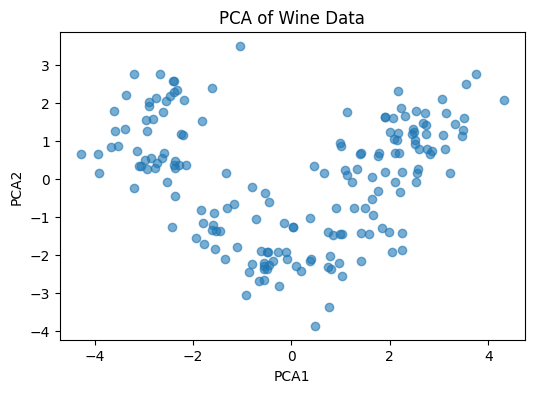

In [11]:
# Plot the PCA results
plt.figure(figsize=(6, 4))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.6)
plt.title('PCA of Wine Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

#### DBSCAN

In [12]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.05, min_samples=15)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [13]:
# Check the unique labels
unique_dbscan_labels = np.unique(dbscan_labels)
print(f"Unique DBScan labels: {unique_dbscan_labels}")

Unique DBScan labels: [-1]


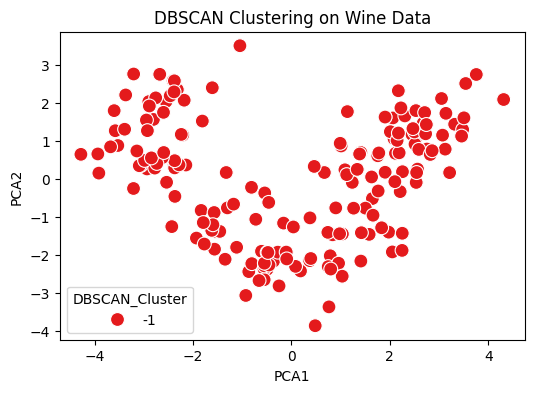

In [14]:
# Plot DBSCAN results
pca_df['DBSCAN_Cluster'] = dbscan_labels
plt.figure(figsize=(6,4))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster',\
                palette='Set1', s=100)
plt.title('DBSCAN Clustering on Wine Data')
plt.show()

In [15]:
dbscan_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

### Clustering
K-Means Clustering

In [16]:
inertia = []
k_range = range(1, 11)

In [17]:
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

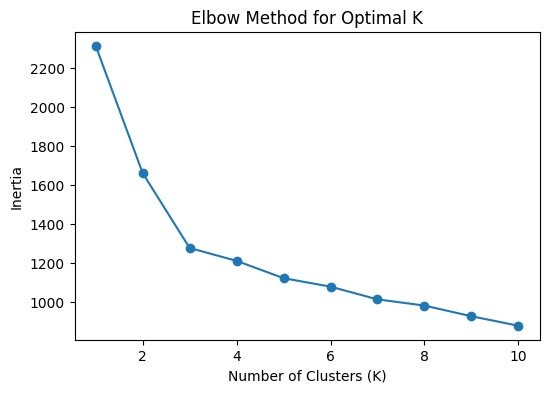

In [18]:
# Plot the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker = 'o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

#### Based on the plot, choose the optimal k (3 clusters) and apply K-Means

In [19]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [20]:
# Addd K-Means cluster labels to the PCA DataFrame for visualization
pca_df['KMeans_Cluster'] = kmeans_labels

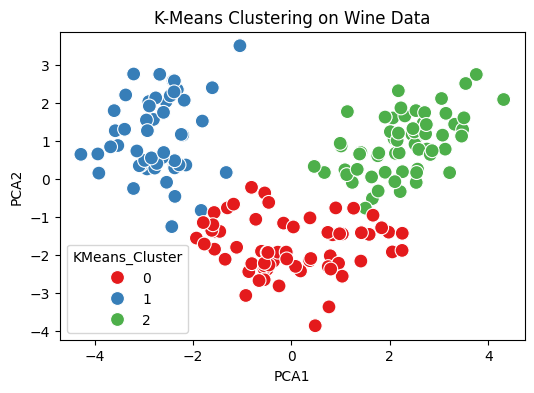

In [21]:
# Plot the clusters based on PCA components
plt.figure(figsize=(6, 4))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', \
                palette='Set1', s=100)
plt.title('K-Means Clustering on Wine Data')
plt.show()

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [22]:
wine_data['Cluster'] = kmeans_labels

In [23]:
print(wine_data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        2  
1   3.40     1050        2  
2   3

In [24]:
print(wine_data['Cluster'])

0      2
1      2
2      2
3      2
4      2
      ..
173    1
174    1
175    1
176    1
177    1
Name: Cluster, Length: 178, dtype: int32


### Validation
Silhouette Score

In [27]:
# Calculate silhouette score for DBSCAN clustering result
if len(unique_dbscan_labels) > 1:
  silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
  print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
  print("DBSCAN did not find multiple clusters. Silhouette score cannot be calculated.")

DBSCAN did not find multiple clusters. Silhouette score cannot be calculated.


In [28]:
# Calculate silhouette score for KMeans clustering result
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f'Silhouette Score for KMeans: {silhouette_kmeans}')

Silhouette Score for KMeans: 0.2848589191898987
